<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg

--2019-04-06 14:29:32--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-04-06 14:29:32 (83.0 MB/s) - ‘imori.jpg’ saved [12638/12638]



#11

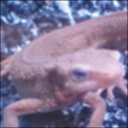

In [3]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

K_size = 3

pad = K_size // 2
out = np.zeros((H+pad*2, W+pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for h in range(H):
  for w in range(W):
    for c in range(C):
      out[h+pad, w+pad, c] = np.mean(tmp[h:h+K_size, w:w+K_size, c])
      
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

cv2.imwrite("out11.jpg", out)
cv2_imshow(out)

#12


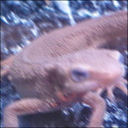

In [27]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H, W, C = img.shape

K_size = 3
K = np.diag( [1] * K_size ).astype(np.float)
K /= K_size

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for h in range(H):
  for w in range(W):
    for c in range(C):
        out[h+pad, w+pad, c] = np.sum(K * tmp[h:h+K_size, w:w+K_size, c])
        
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)
        
cv2.imwrite("out12.jpg", out)
cv2_imshow(out)